# Imports

In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

# Create UserGenerator instance

In [2]:
from synabon.users import UserGenerator

In [3]:
n_users = 1000
start_dt = datetime.strptime("2023/01/01", "%Y/%m/%d")
end_dt = datetime.strptime("2023/02/01", "%Y/%m/%d")

In [4]:
from functools import partial

scale = 1000
start_balance_generator = partial(np.random.exponential, scale=scale)
end_balance_generator = partial(np.random.exponential, scale=scale + 100)
n_interactions_generator = partial(np.random.poisson, lam=10)

In [5]:
ug = UserGenerator(
    n_users,
    # start_balance_generator,
    # end_balance_generator,
    # n_interactions_generator,
    n_countries=5,
    p_countries=[0.1, 0.2, 0.3, 0.35, 0.05]
)

In [6]:
df = ug.get_data(start_dt, end_dt)

In [7]:
df.head(10)

,user_id,user_balance,interaction_sum,interaction_type,transaction_commission,country,device,date
0,6084207f-d8ab-4a67-9f8a-d9093f49a441,745.016071,NaN,registration,NaN,Nauru,Opera/8.51.(Windows NT 5.2; xh-ZA) Presto/2.9....,2023-01-01
933,e01ae52d-c951-4c4a-8fa6-a6c6682b2dfd,587.196708,NaN,registration,NaN,United States Virgin Islands,Opera/8.97.(Windows 98; brx-IN) Presto/2.9.163...,2023-01-01
2352,8226da6d-e1e9-4ddd-bcae-4ec3f36a74e6,1448.805547,NaN,registration,NaN,New Zealand,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_0...,2023-01-01
10609,c129b2d3-5bee-4574-a9ff-f3f1f2d97e1b,982.390678,NaN,registration,NaN,Nauru,Mozilla/5.0 (compatible; MSIE 9.0; Windows 98;...,2023-01-01
5240,93e8863d-6ffd-419e-8eed-6e5d9cf1320d,423.397820,NaN,registration,NaN,Guam,Mozilla/5.0 (Windows NT 6.1; aa-DJ; rv:1.9.1.2...,2023-01-01
8683,c536b820-af13-455a-90eb-5356b19f7966,487.317629,NaN,registration,NaN,New Zealand,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_10_6 r...,2023-01-01
7118,286beacf-13dd-4520-a62d-8a072ed0ad15,1759.195283,NaN,registration,NaN,Guam,Opera/8.69.(X11; Linux x86_64; ha-NG) Presto/2...,2023-01-01
5232,9608e70c-ae8b-4247-a182-d278c4ef7958,603.660436,NaN,registration,NaN,Malawi,Mozilla/5.0 (Windows; U; Windows NT 6.0) Apple...,2023-01-01
9277,83e1ef17-cd43-45d7-a058-11d96757265c,21.168309,NaN,registration,NaN,Nauru,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,2023-01-01
2365,22d87f27-8c1e-4f64-aa6c-b88511c0eaf1,1542.954835,NaN,registration,NaN,United States Virgin Islands,Mozilla/5.0 (iPad; CPU iPad OS 3_1_3 like Mac ...,2023-01-01


In [8]:
df.shape

(10914, 8)

In [9]:
df["user_id"].nunique()

1000

# Let's see the distribution of balances at the start

In [10]:
mask = df["interaction_type"] == "registration"
df_start = df[mask]
df_start.shape

(1000, 8)

<Axes: xlabel='user_balance', ylabel='Count'>

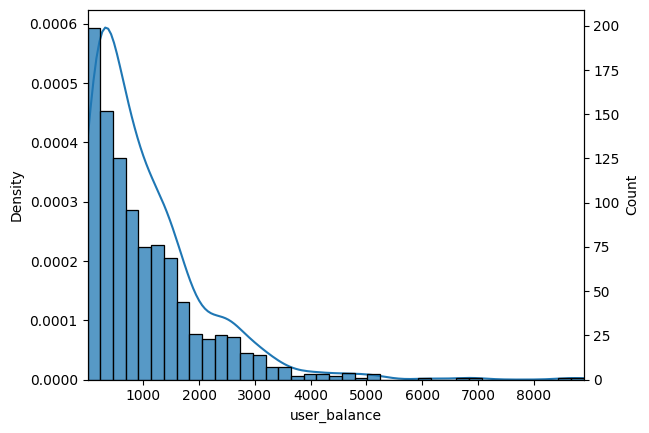

In [11]:
fig, ax1 = plt.subplots()
sns.kdeplot(data=df_start, x="user_balance", ax=ax1)
ax1.set_xlim((df_start["user_balance"].min(), df_start["user_balance"].max()))
ax2 = ax1.twinx()
sns.histplot(data=df_start, x="user_balance", ax=ax2)

# Let's see how the balances of some users changed

In [12]:
user_ids = np.random.choice(df["user_id"].unique(), size=3)
mask = (df["user_id"].isin(user_ids))
user_df = df[mask]
user_df.head(5)

,user_id,user_balance,interaction_sum,interaction_type,transaction_commission,country,device,date
3200,ef6d6e31-9fc4-438e-b9fc-627a73c74804,877.047187,NaN,registration,NaN,United States Virgin Islands,Mozilla/5.0 (Windows; U; Windows NT 5.01) Appl...,2023-01-01 00:00:00
4060,44c3e3c5-943f-46e8-b8e2-8bc736e8c506,118.986165,NaN,registration,NaN,Nauru,Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_7...,2023-01-01 00:00:00
4486,84c568e0-5b03-4ef5-895a-c340ae62cd97,274.727507,NaN,registration,NaN,Nauru,Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_7...,2023-01-01 00:00:00
4061,44c3e3c5-943f-46e8-b8e2-8bc736e8c506,4108.516178,3989.530013,transaction,11.968590,Nauru,Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_7...,2023-01-02 09:06:28
4487,84c568e0-5b03-4ef5-895a-c340ae62cd97,2665.402636,2390.675129,transaction,7.172025,Nauru,Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_7...,2023-01-02 11:59:18


In [13]:
user_df.shape

(33, 8)

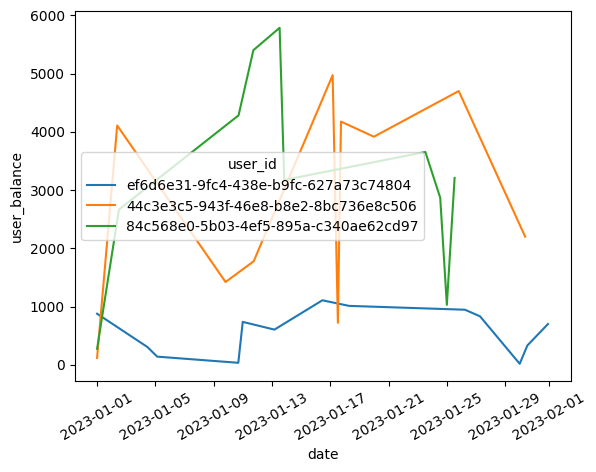

In [14]:
g = sns.lineplot(x="date", y="user_balance", hue="user_id", data=user_df)
tmp = g.set_xticklabels(g.get_xticklabels(), rotation=30)

# Let's look at the distribution of balances at the end

In [15]:
df_last = df.sort_values(by="date").groupby(by="user_id").tail(1)

In [16]:
df_last.head()

,user_id,user_balance,interaction_sum,interaction_type,transaction_commission,country,device,date
4257,63ff526f-7314-4bf9-93e3-b0209caa2b51,2143.358399,-3114.254347,transaction,9.342763,New Zealand,Mozilla/5.0 (Linux; Android 2.0) AppleWebKit/5...,2023-01-09 00:57:29
3676,75bc9c88-a5f2-4aeb-a41d-79c84bfee85e,932.150241,-764.072092,transaction,2.292216,Nauru,Mozilla/5.0 (Windows NT 6.1; ks-IN; rv:1.9.2.2...,2023-01-10 06:40:55
2037,2791d9fc-231f-40aa-8ea0-98c54669ed3f,406.766875,-68.786741,transaction,0.206360,United States Virgin Islands,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_1...,2023-01-13 00:26:36
6893,03be271e-4189-4040-b779-d8d73cecbdba,430.137577,342.762918,transaction,1.028289,Nauru,Opera/9.96.(Windows NT 5.0; nan-TW) Presto/2.9...,2023-01-13 04:38:48
9156,47361071-0e97-40eb-9429-8b9e257186ff,476.790977,-396.056462,transaction,1.188169,United States Virgin Islands,Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_9...,2023-01-13 10:31:37


In [17]:
df_last.shape

(1000, 8)

<Axes: xlabel='user_balance', ylabel='Count'>

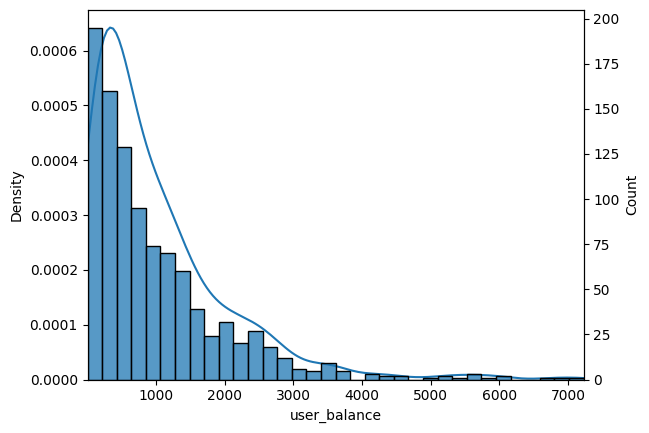

In [18]:
fig, ax1 = plt.subplots()
sns.kdeplot(data=df_last, x="user_balance", ax=ax1)
ax1.set_xlim((df_last["user_balance"].min(), df_last["user_balance"].max()))
ax2 = ax1.twinx()
sns.histplot(data=df_last, x="user_balance", ax=ax2)

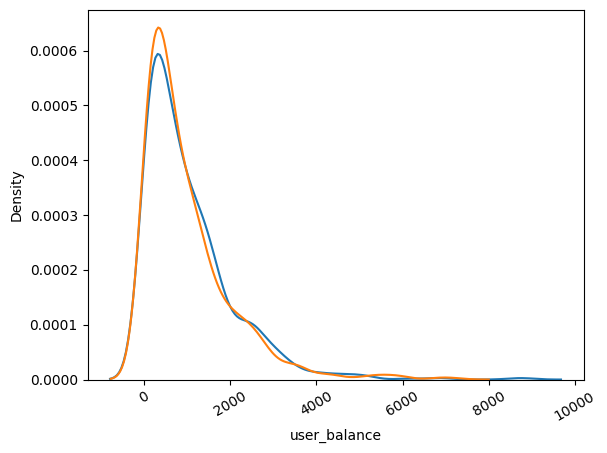

In [19]:
g = sns.kdeplot(x="user_balance", data=df_start)
g = sns.kdeplot(x="user_balance", data=df_last)
tmp = g.set_xticklabels(g.get_xticklabels(), rotation=30)

In [20]:
print(f"MEAN Before: {np.mean(df_start['user_balance'])}")
print(f"MEAN After: {np.mean(df_last['user_balance'])}")


MEAN Before: 1040.1973237929399
MEAN After: 995.8691937025005


# Let's look at the behavior of commission

In [21]:
mask = df["interaction_type"] != "registration"
df_commission = df[mask]
df_commission["cumsum"] = df_commission["transaction_commission"].cumsum()


In [22]:
df_commission.head()

,user_id,user_balance,interaction_sum,interaction_type,transaction_commission,country,device,date,cumsum
6673,27b454fc-6f87-4da0-b3af-da5f3e5185f4,230.293509,194.035803,transaction,0.582107,United States Virgin Islands,Opera/9.59.(X11; Linux i686; cmn-TW) Presto/2....,2023-01-02 00:01:54,0.582107
9734,3eee97d1-ba93-471b-aa0a-c1135aaace56,1600.597186,990.980512,transaction,2.972942,Nauru,Mozilla/5.0 (compatible; MSIE 7.0; Windows NT ...,2023-01-02 00:04:15,3.555049
6403,fb3dba03-aa60-4929-b365-709794fffc1d,447.213424,-267.957149,transaction,0.803871,Nauru,Mozilla/5.0 (Android 4.4.2; Mobile; rv:13.0) G...,2023-01-02 00:09:14,4.358920
955,f87b00ce-10b0-440e-a97f-e246e024cff1,543.655447,520.546932,transaction,1.561641,United States Virgin Islands,Mozilla/5.0 (compatible; MSIE 5.0; Windows CE;...,2023-01-02 00:10:10,5.920561
10506,e73fb476-91a7-47e9-8f55-7ec578fb1973,2801.374575,1771.511616,transaction,5.314535,New Zealand,Mozilla/5.0 (iPad; CPU iPad OS 7_1_2 like Mac ...,2023-01-02 00:11:07,11.235096


In [23]:
df_commission.tail()

,user_id,user_balance,interaction_sum,interaction_type,transaction_commission,country,device,date,cumsum
4361,5f891ce2-9281-42f5-8367-fcb4c76fc110,250.031227,-5.719066,transaction,0.017157,Nauru,Mozilla/5.0 (Windows; U; Windows NT 4.0) Apple...,2023-01-31 23:42:35,30056.232957
10100,1dd6394c-9470-48a5-8a48-8134ea75299f,2481.526241,1093.605812,transaction,3.280817,New Zealand,Mozilla/5.0 (Windows; U; Windows NT 5.1) Apple...,2023-01-31 23:42:57,30059.513775
2670,cf9f2057-e12b-4b39-9c6b-40dc7f794bc3,111.046063,-134.502833,transaction,0.403509,New Zealand,Opera/9.29.(Windows NT 6.0; az-IN) Presto/2.9....,2023-01-31 23:51:10,30059.917283
446,e30d2932-94e7-4896-89b2-0a9eda74dcf6,272.105886,-360.568662,transaction,1.081706,Nauru,Opera/9.41.(Windows NT 5.01; hak-TW) Presto/2....,2023-01-31 23:54:20,30060.998989
3481,bc117032-12fa-41f2-8a9b-615fad99cc1a,485.840936,311.835982,transaction,0.935508,Nauru,Mozilla/5.0 (iPod; U; CPU iPhone OS 3_1 like M...,2023-01-31 23:57:19,30061.934497


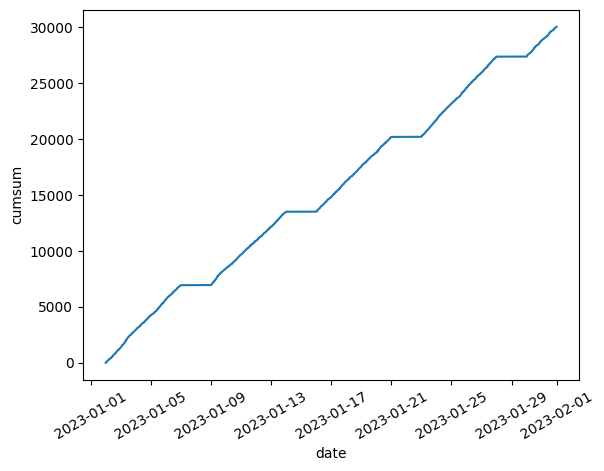

In [24]:
# в промежутки времени когда cumsum=const наступили выходные. Нет транзакций - нет коммиссии.
g = sns.lineplot(x="date", y="cumsum", data=df_commission)
tmp = g.set_xticklabels(g.get_xticklabels(), rotation=30)

# Let's look at the distribution of the number of interactions

In [25]:
mask = df["interaction_type"] != "registration"
df_inter = df[mask]
df_inter["trunc_date"] = df_inter["date"].dt.strftime("%Y/%m/%d")
df_day = df_inter.groupby("user_id").size().reset_index(name="count_transactions")
df_day.head()

,user_id,count_transactions
0,001ae62b-ac6b-48ec-b05a-08ca6439704c,10
1,002e34b2-6376-4bf8-910d-0d182ce75194,10
2,00d28d98-1eb5-4b97-94b4-867389759173,8
3,00f5a5f0-dfbf-45c8-9d6c-35102ddd656b,9
4,00f65ebf-3b9d-435f-af7b-ef9c3cf95fb2,4


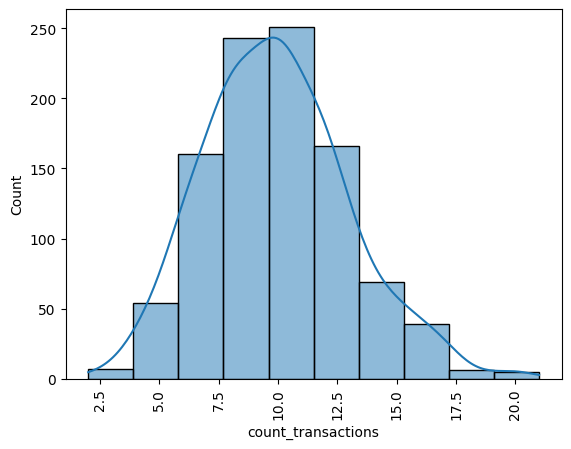

In [26]:
g = sns.histplot(x="count_transactions", data=df_day, bins=10, kde=True)
tmp = g.set_xticklabels(g.get_xticklabels(), rotation=90)

# Let's look at the distribution of countries

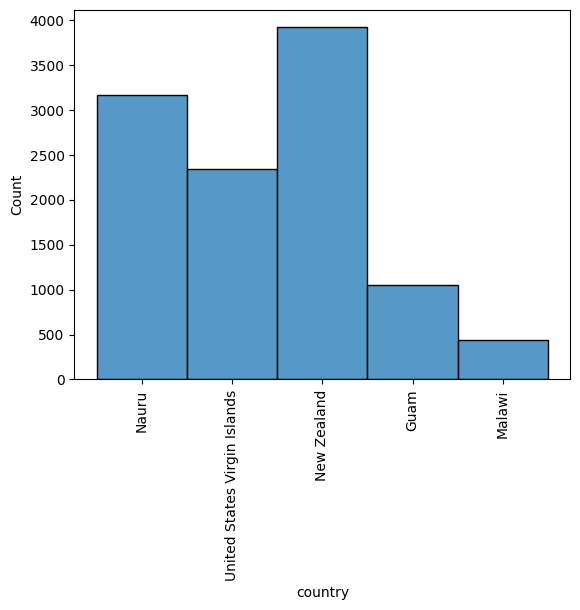

In [28]:
g = sns.histplot(x="country", data=df)
tmp = g.set_xticklabels(g.get_xticklabels(), rotation=90)

# Some tests

In [27]:
df_start[df_start['user_balance'] < 0]["user_id"].count()

0

In [28]:
df_last[df_last['user_balance'] < 0]["user_id"].count()

0